### High-Frequency Term Structure: Data Overview

#### D'Amico and Wickman, 2025



In [14]:
# Helpful packages
import statsmodels as sm
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Import data
weekly = pd.read_csv('../data/clean/weekly_data_2024.csv', index_col='date', parse_dates=True)
monthly = pd.read_csv('../data/clean/monthly_data_2024.csv', index_col='date', parse_dates=True)

### Overview of variables

Note that all data is attributed to the observation (release) date, not the date that the data corresponds to.

In [13]:
# Variable names
print(weekly.columns.values)

['select_soma' 'treasuries' 'agency_mbs' 'bonds' 'tbills' 'tips'
 'floating_rate_notes' 'oil' 'fcm2' 'natural_gas' 'lead' 'oil_rig_count'
 'gas_rig_count' 'crude_oil_prod' 'wei' 'lumber_prod' 'fcm1' 'fcm3' 'fcm5'
 'fcm7' 'fcm10' 'fcm30' 'ffed' 'implied_level_2' 'implied_slope_30'
 'implied_curvature_30' 'implied_slope_10' 'implied_curvature_10' 'index'
 'equipment_inf' 'food_inf' 'health_inf' 'recreation_inf'
 'transportation_inf' 'LSAP' 'lumber_prod_adj']


### (1a) Yields

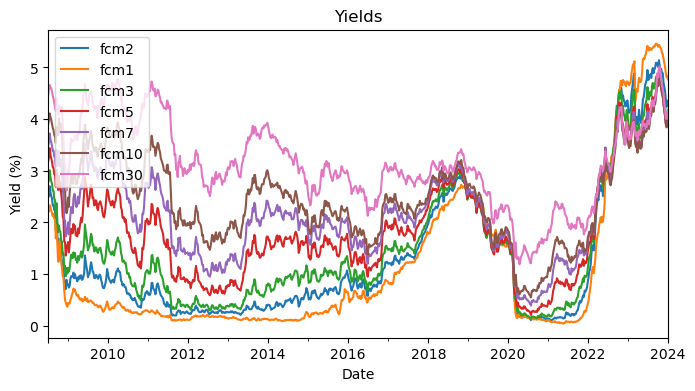

In [30]:
# Plot of yields
weekly.filter(like='fcm').plot(figsize=(8, 4), title='Yields')
plt.xlabel('Date'); plt.ylabel('Yield (%)')
plt.legend(loc='upper left'); plt.show()

### (2) Yield curve factors

1. Level as 2-yr yield (fcm2 in previous plot)
2. Slope as long-term minus short-term yield, curvature as twice the medium-term (5 yr) yield minus the long-term and short-term (2 yr) yields.
3. Calculated with long-term yields as 10-yr and 30-yr for robustness.

Curvature measures how pronounced the middle part of the yield curve is relative to the short and long ends. A positive curvature factor indicates a hump-shaped curve around the 10-year maturity, while a negative value implies a trough or concave shape.

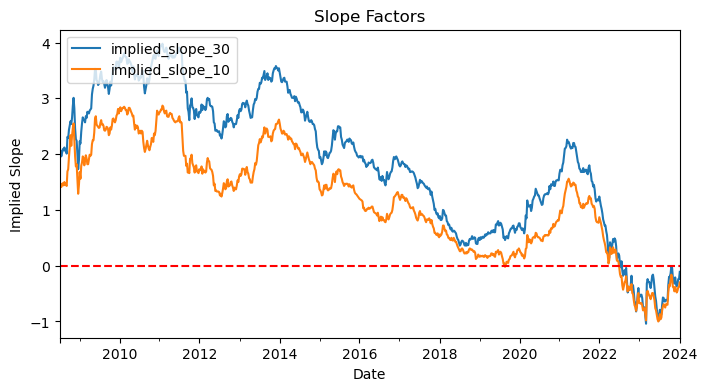

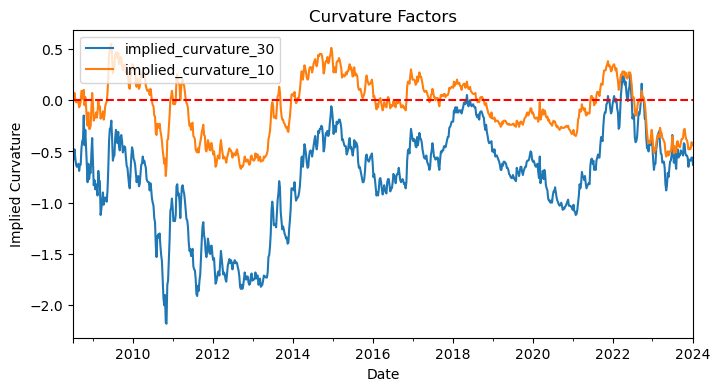

In [29]:
# Compare slope measures
weekly[['implied_slope_30', 'implied_slope_10']].plot(figsize=(8, 4), title='Slope Factors')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Date'); plt.ylabel('Implied Slope')
plt.legend(loc='upper left'); plt.show()

# Compare curvature measures
weekly[['implied_curvature_30', 'implied_curvature_10']].plot(figsize=(8, 4), title='Curvature Factors')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Date'); plt.ylabel('Implied Curvature')
plt.legend(loc='upper left'); plt.show()

### (3) NY Fed SOMA Holdings
1. Bonds refer to US Treasury Notes and Bonds
2. 'Select_soma' calculated as the sum of Agency MBS, Bonds, T-Bills, TIPS, and Floating Rate Notes.
3. 'Treasuries' calculated as the sum of Bonds, T-Bills, and Floating Rate Notes. (TIPS, MBS excluded)

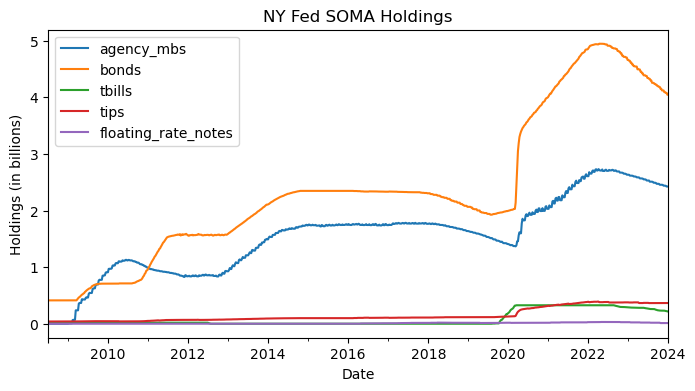

In [31]:
# SOMA Holdings
weekly[['agency_mbs', 'bonds', 'tbills', 'tips', 'floating_rate_notes']].plot(figsize=(8, 4), title='NY Fed SOMA Holdings')
plt.xlabel('Date'); plt.ylabel('Holdings (in billions)')
plt.legend(loc='upper left'); plt.show()

### (4) Eric Swanson's LSAP Factor

From "The Macroeconomic Effects of the Federal Reserve’s Conventional and Unconventional Monetary Policies". Interpreted as the market response to QE, asset purchase announcements and is scaled so that a 1-unit change in LSAPs lowers the 10-year Treasury yield by 1 percent (we don't use the negative LSAP rotation).

* Updated through May 3, 2023

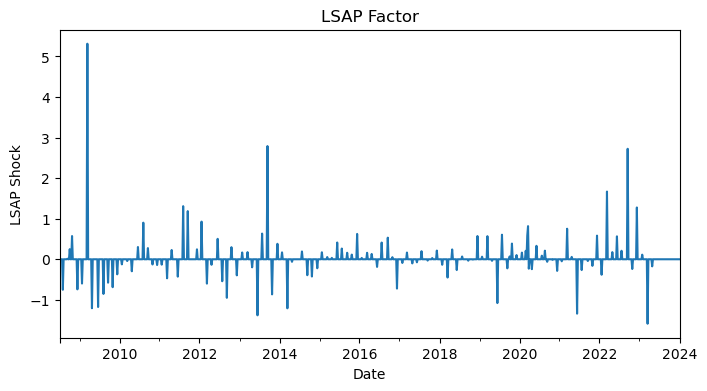

In [37]:
# Plot LSAP factor
weekly['LSAP'].plot(figsize=(8, 4), title='LSAP Factor')
plt.xlabel('Date'); plt.ylabel('LSAP Shock'); plt.show()

### (5) Real activity measures

We select US Distillate Fuel Oil Refinery Production (oil) as a high-frequency proxy for industrial production (83% correlated over the sample period). Distillate fuel oil includes diesel and heating oil, crucial for transportation (notably trucking), industrial use, and heating. Hence, its production and consumption serve as an indicator of economic activity because they reflect the demand for energy in moving goods and powering manufacturing and utilities. Oil is a weekly, seasonally-adjusted metric that measures oil production in thousands of barrels per day, with records starting in 1982.

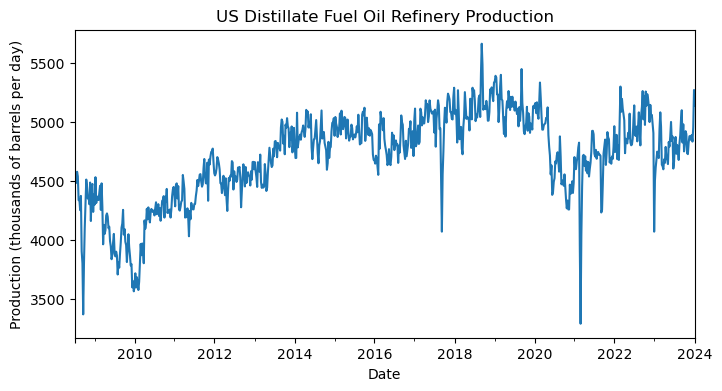

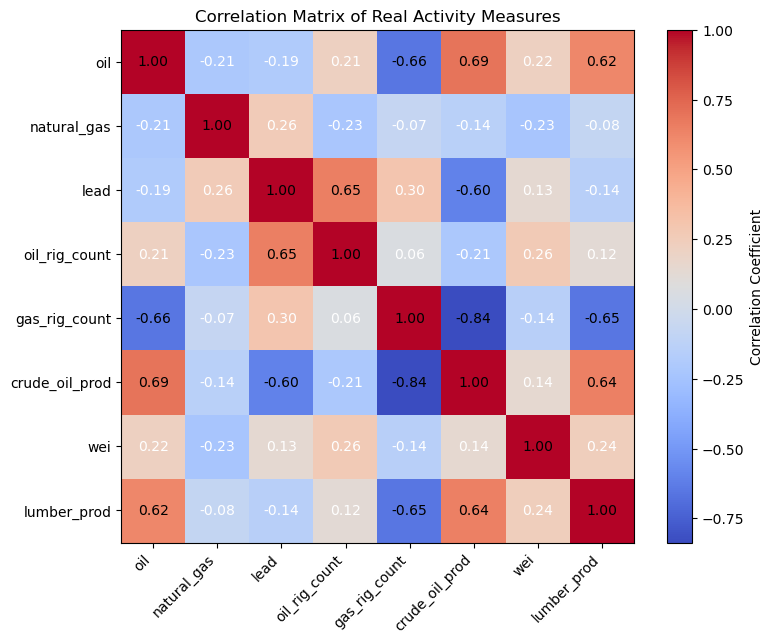

In [56]:
# Oil production time-series
weekly['oil'].plot(figsize=(8, 4), title='US Distillate Fuel Oil Refinery Production')
plt.xlabel('Date'); plt.ylabel('Production (thousands of barrels per day)')
plt.show()

# Understand correlations between proposed real activity measure
corr_vars = ['oil', 'natural_gas', 'lead', 'oil_rig_count', 'gas_rig_count', 'crude_oil_prod', 'wei', 'lumber_prod']
corr_matrix = weekly[corr_vars].corr()

plt.figure(figsize=(8, 6.5))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(corr_vars)), corr_vars, rotation=45, ha='right')
plt.yticks(range(len(corr_vars)), corr_vars)
for i in range(len(corr_vars)):
    for j in range(len(corr_vars)):
        plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black' if abs(corr_matrix.iloc[i, j]) > 0.5 else 'white')
plt.title('Correlation Matrix of Real Activity Measures')
plt.tight_layout()
plt.show()

### (6) PriceStats Inflation data

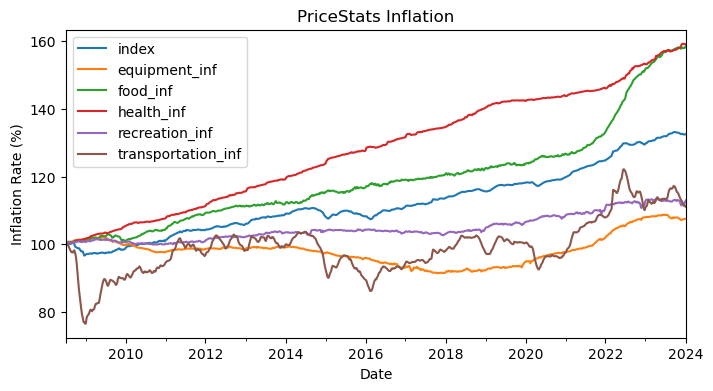

In [54]:
# Plot inflation data
weekly[['index', 'equipment_inf', 'food_inf', 'health_inf', 'recreation_inf', 'transportation_inf']].plot(figsize=(8, 4), title='PriceStats Inflation')
plt.xlabel('Date'); plt.ylabel('Inflation Rate (%)')
plt.show()